# EDA & Feature Engineering

## Import Libraries & Datasets
---

In [1]:
# !pip install haversine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import datetime as dt

from haversine import haversine

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans

from sklearn.neighbors import KernelDensity
from sklearn.metrics import silhouette_score

# Set view options for Pandas
pd.set_option('display.max_columns', None)

# Set style for plots
style.use('seaborn-whitegrid')

In [3]:
train = pd.read_csv('../assets/train_clean.csv')
test = pd.read_csv('../assets/test_clean.csv')
weather = pd.read_csv('../assets/weather_clean.csv')
spray = pd.read_csv('../assets/spray_clean.csv')

In [4]:
# Converting date to datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
weather['date'] = pd.to_datetime(weather['date'])
# spray['date'] = pd.to_datetime(spray['date'])

In [5]:
train.head()

date  trap   latitude  longitude  year  month  week  dayofyear  \
0 2007-05-29  T096  41.731922 -87.677512  2007      5    22        149   
1 2007-05-29  T002  41.954690 -87.800991  2007      5    22        149   
2 2007-05-29  T015  41.974089 -87.824812  2007      5    22        149   
3 2007-05-29  T048  41.867108 -87.654224  2007      5    22        149   
4 2007-05-29  T050  41.919343 -87.694259  2007      5    22        149   

   nummosquitos  wnvpresent  species-culex_pipiens  \
0             1           0                      1   
1             1           0                      0   
2             1           0                      0   
3             1           0                      0   
4             1           0                      0   

   species-culex_pipiens/restuans  species-culex_restuans  
0                               0                       0  
1                               1                       0  
2                               1                       0  
3                               1                       0  
4                               1                       0

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            8475 non-null   datetime64[ns]
 1   trap                            8475 non-null   object        
 2   latitude                        8475 non-null   float64       
 3   longitude                       8475 non-null   float64       
 4   year                            8475 non-null   int64         
 5   month                           8475 non-null   int64         
 6   week                            8475 non-null   int64         
 7   dayofyear                       8475 non-null   int64         
 8   nummosquitos                    8475 non-null   int64         
 9   wnvpresent                      8475 non-null   int64         
 10  species-culex_pipiens           8475 non-null   int64         
 11  spec

In [7]:
spray.head()

date   latitude  longitude  year  month  week  dayofyear
0  2011-08-29  42.391623 -88.089163  2011      8    35        241
1  2011-08-29  42.391348 -88.089163  2011      8    35        241
2  2011-08-29  42.391022 -88.089157  2011      8    35        241
3  2011-08-29  42.390637 -88.089158  2011      8    35        241
4  2011-08-29  42.390410 -88.088858  2011      8    35        241

In [8]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       14294 non-null  object 
 1   latitude   14294 non-null  float64
 2   longitude  14294 non-null  float64
 3   year       14294 non-null  int64  
 4   month      14294 non-null  int64  
 5   week       14294 non-null  int64  
 6   dayofyear  14294 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 781.8+ KB


In [9]:
weather.head()

station       date  tmax  tmin  tavg  depart  dewpoint  wetbulb  \
0        1 2007-05-01    83    50  67.0    14.0        51     56.0   
1        2 2007-05-01    84    52  68.0    14.0        51     57.0   
2        1 2007-05-02    59    42  51.0    -3.0        42     47.0   
3        2 2007-05-02    60    43  52.0    -3.0        42     47.0   
4        1 2007-05-03    66    46  56.0     2.0        40     48.0   

   preciptotal  stnpressure  sealevel  resultspeed  resultdir  avgspeed  year  \
0          0.0        29.10     29.82          1.7         27       9.2  2007   
1          0.0        29.18     29.82          2.7         25       9.6  2007   
2          0.0        29.38     30.09         13.0          4      13.4  2007   
3          0.0        29.44     30.08         13.3          2      13.4  2007   
4          0.0        29.39     30.12         11.7          7      11.9  2007   

   month  week  dayofyear    daytime  ra  ts  sn  dz  gr  fg+  fu  br  hz  fg  \
0      5    18        121  14.016667   0   0   0   0   0    0   0   0   0   0   
1      5    18        121  14.016667   0   0   0   0   0    0   0   0   0   0   
2      5    18        122  14.050000   0   0   0   0   0    0   0   1   0   0   
3      5    18        122  14.050000   0   0   0   0   0    0   0   1   1   0   
4      5    18        123  14.083333   0   0   0   0   0    0   0   0   0   0   

   sq  bc  vc  mi   humidavg  
0   0   0   0   0  56.438576  
1   0   0   0   0  54.526426  
2   0   0   0   0  71.195808  
3   0   0   0   0  68.614962  
4   0   0   0   0  54.874919

In [10]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   float64       
 8   preciptotal  2944 non-null   float64       
 9   stnpressure  2944 non-null   float64       
 10  sealevel     2944 non-null   float64       
 11  resultspeed  2944 non-null   float64       
 12  resultdir    2944 non-null   int64         
 13  avgspeed     2944 non-null   float64       
 14  year         2944 non-null   int64         
 15  month        2944 non-null   int64         
 16  week  

## Presence of the WNV w.r.t. Time
---

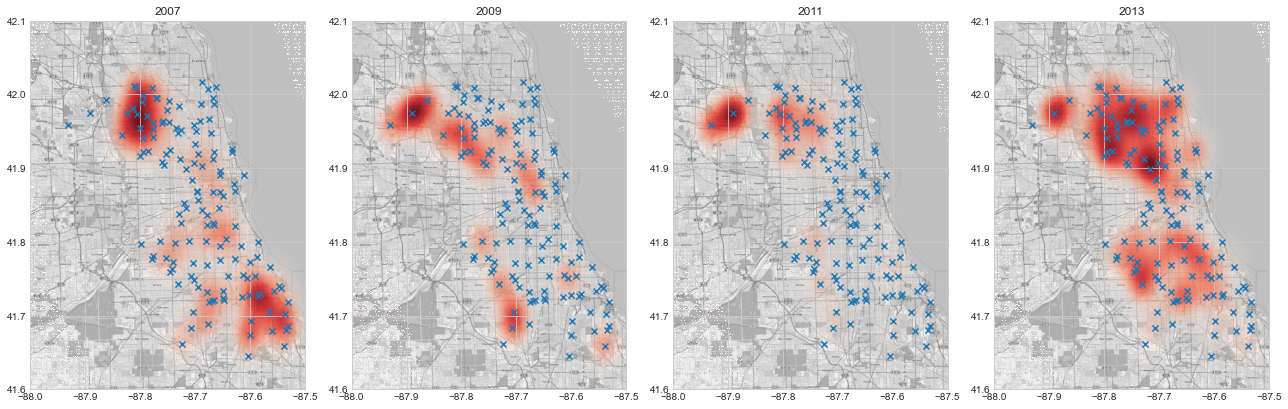

In [11]:
# Load map data
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('../assets/train_clean.csv', parse_dates=['date'])[['date', 'trap','longitude', 'latitude', 'wnvpresent']]

# Create colormap to plot kernal density
alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

# use a for loop to plot kernel density in each year
plt.figure(figsize=(18,8))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['wnvpresent'] > 0) & (traps['date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['date', 'trap','longitude', 'latitude']).max()['wnvpresent'].reset_index()
    X = sightings[['longitude', 'latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    plt.subplot(subplot)
    plt.gca().set_title(year)
    plt.imshow(mapdata, 
               cmap=plt.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    plt.tight_layout()
    locations = traps[['longitude', 'latitude']].drop_duplicates().values
    plt.scatter(locations[:,0], locations[:,1], marker='x')
    
plt.tight_layout()
plt.savefig('../images/wnv_traps_yearly_mapping.png', dpi = 150)
plt.show()

- The location of mosquito traps remains unchanged through the years. 
- There has been a steady decline of WNV from 2007 to 2011, but there was a peak outbreak in 2013 again.

In [12]:
train['wnvpresent'].value_counts()

0    8018
1     457
Name: wnvpresent, dtype: int64

In [13]:
train['wnvpresent'].value_counts(normalize=True)

0    0.946077
1    0.053923
Name: wnvpresent, dtype: float64

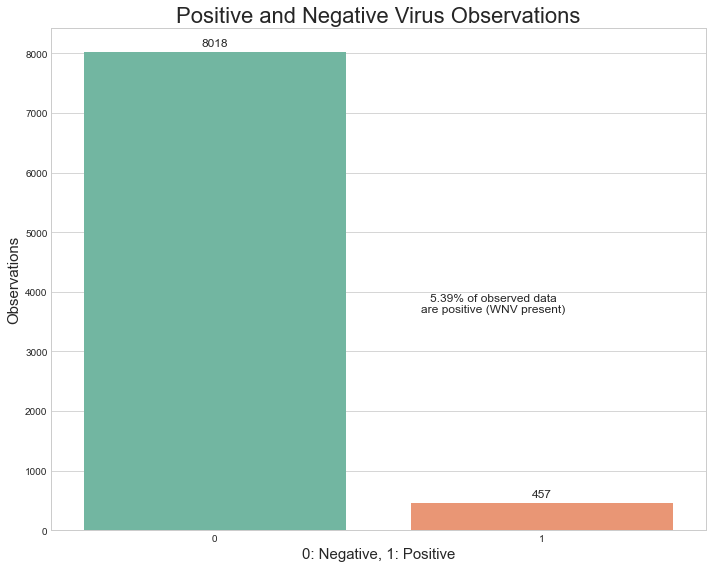

In [14]:
neg_count = train['wnvpresent'].value_counts()[0]
pos_count = train['wnvpresent'].value_counts()[1]
pos_percent = train['wnvpresent'].value_counts(normalize=True)[1] * 100

fig, axes = plt.subplots(figsize=(10,8))
sns.countplot( x='wnvpresent', data = train, palette='Set2')
plt.title('Positive and Negative Virus Observations', fontsize=22)
plt.xlabel('0: Negative, 1: Positive', fontsize=15)
plt.ylabel('Observations', fontsize=15)

plt.text(x=0, y=neg_count+100, s=str(neg_count), fontsize=12, ha='center')
plt.text(x=1, y=pos_count+100, s=str(pos_count), fontsize=12, ha='center')

plt.figtext(x=0.69, y=0.45, 
            s=f"{round(pos_percent, 2)}% of observed data\nare positive (WNV present)", 
            fontsize=12, ha='center');

plt.tight_layout()
plt.savefig('../images/positive_and_negative_virus_in_mosquitos.png', dpi = 150)

**Baseline model (Accuracy Score)**
- 94.61% without WNV
- 5.39% with WNV

From the above observations, out of the total 8475 speices, 457 (5.39%) are present with the WNV (positive) and 8018 (94.61%) are not infected with the WNV (negative). This shows the classes are not very balanced.

This directs the baseline accuracy of 94.6% which would imply that the prediciton for all observations of the WNV will not be present and 94.6% would be correct. However, this might not be useful as the predicted case for the pressence of the WNV might actually be present. 

For this case to then explore more towards other potential insights to balance the two classes.

In [15]:
# Creating list species for plot calculation
species = []

for i in train.index:
    cur_species = ''
    
    if train.loc[i, 'species-culex_pipiens/restuans']==1:
        cur_species = 'culex_pipiens/restuans'    
    elif train.loc[i, 'species-culex_pipiens']==1:
        cur_species = 'culex_pipiens'
    elif train.loc[i, 'species-culex_restuans']==1:
        cur_species = 'culex_restuans'
    else:
        cur_species = 'others'
    
    species.append(cur_species)

# creating dataframe for plotting
species_df = pd.DataFrame(species, columns= ['species'])
species_df = pd.get_dummies(species_df, prefix_sep='-')
species_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8475 entries, 0 to 8474
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   species-culex_pipiens           8475 non-null   uint8
 1   species-culex_pipiens/restuans  8475 non-null   uint8
 2   species-culex_restuans          8475 non-null   uint8
 3   species-others                  8475 non-null   uint8
dtypes: uint8(4)
memory usage: 33.2 KB


In [16]:
# Calculating proportions of WNV present with the species to be used in the barplot

wnv_pip = len(train[(train['wnvpresent']==1) & (train['species-culex_pipiens']==1)])
no_wnv_pip = len(train[(train['wnvpresent']==0) & (train['species-culex_pipiens']==1)])
wnv_res = len(train[(train['wnvpresent']==1) & (train['species-culex_restuans']==1)])
no_wnv_res = len(train[(train['wnvpresent']==0) & (train['species-culex_restuans']==1)])
wnv_pipres = len(train[(train['wnvpresent']==1) & (train['species-culex_pipiens/restuans']==1)])
no_wnv_pipres = len(train[(train['wnvpresent']==0) & (train['species-culex_pipiens/restuans']==1)])
wnv_others = len(train[(train['wnvpresent']==1) & (species_df['species-others']==1)])
no_wnv_others = len(train[(train['wnvpresent']==0) & (species_df['species-others']==1)])

percent_wnv_pip = wnv_pip / (wnv_pip + no_wnv_pip) * 100
percent_wnv_res = wnv_res / (wnv_res + no_wnv_res) * 100
percent_wnv_pipres = wnv_pipres / (wnv_pipres + no_wnv_pipres) * 100
precent_wnv_others = wnv_others / (wnv_others + no_wnv_others) * 100

print('Total culex_pipiens species without WNV:')
print(no_wnv_pip) 
print('\nTotal culex_pipiens species with WNV: ')
print(wnv_pip) 
print('\nTotal culex_pipiens/restuans species without WNV:')
print(no_wnv_pipres) 
print('\nTotal culex_pipiens/restuans species with WNV:')
print(wnv_pipres) 
print('\nTotal culex_restuans species without WNV:')
print(no_wnv_res) 
print('\nTotal culex_restuans species with WNV:')
print(wnv_res)
print('\nTotal other species(where culex_pipiens, culex_restuans & culex_pipiens/restuans = 0) without WNV:')
print(no_wnv_others)
print('\nTotal other species(where culex_pipiens, culex_restuans & culex_pipiens/restuans = 0) with WNV:')
print(wnv_others) 


Total culex_pipiens species without WNV:
1766

Total culex_pipiens species with WNV: 
184

Total culex_pipiens/restuans species without WNV:
3601

Total culex_pipiens/restuans species with WNV:
225

Total culex_restuans species without WNV:
2345

Total culex_restuans species with WNV:
48

Total other species(where culex_pipiens, culex_restuans & culex_pipiens/restuans = 0) without WNV:
306

Total other species(where culex_pipiens, culex_restuans & culex_pipiens/restuans = 0) with WNV:
0


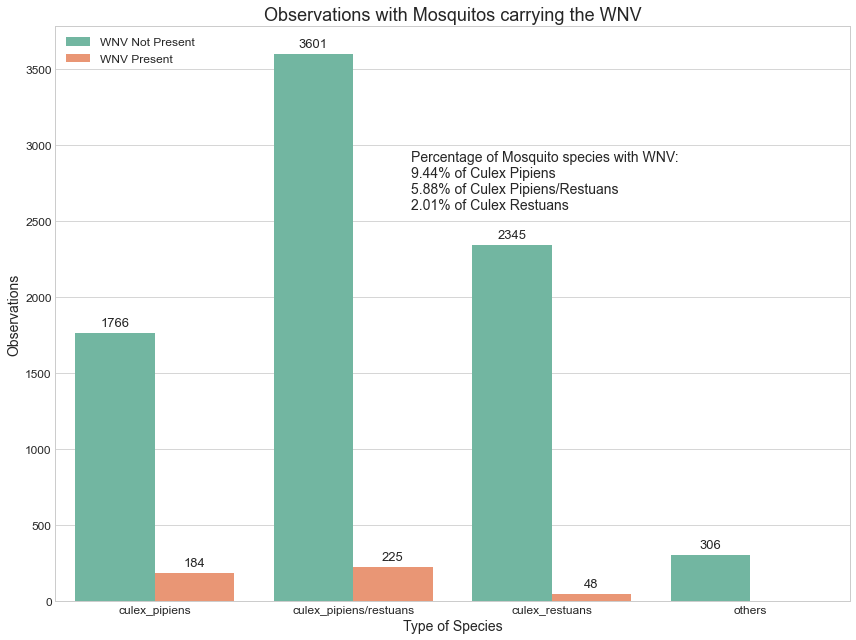

In [17]:
# Plotting barplot showing the presence of WNV with species of Mosquitos.

plt.figure(figsize=(12,9))

ax = sns.countplot(x=species, hue='wnvpresent', data=train, palette='Set2')

ax.tick_params(axis='both', labelsize=12)

plt.legend(fontsize=12, labels=['WNV Not Present', 'WNV Present'])

plt.xlabel("Type of Species", fontsize=14)
plt.ylabel("Observations", fontsize=14)

plt.title("Observations with Mosquitos carrying the WNV", fontsize=18)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=13)

text_str = f"Percentage of Mosquito species with WNV:\n{round(percent_wnv_pip, 2)}% of Culex Pipiens\n{round(percent_wnv_pipres, 2)}% of Culex Pipiens/Restuans\n{round(percent_wnv_res, 2)}% of Culex Restuans"
plt.figtext(x=0.48, y=0.67, s=text_str, fontsize=14);

plt.tight_layout()
plt.savefig('../images/mosquitos_with_without_wnv.png', dpi = 150)


- Only two species of mosquitoes has a probability of carrying the WNV, namely 'Culex Pipiens' and 'Culex Restuans'. 
- The species of mosquito that has the highest probability (9.22%) of carrying the WNV is the 'Culex Pipiens'.
- The species of mosquito that has the lowest probability (2.01%) of carrying the WNV is the 'Culex Restuans' 

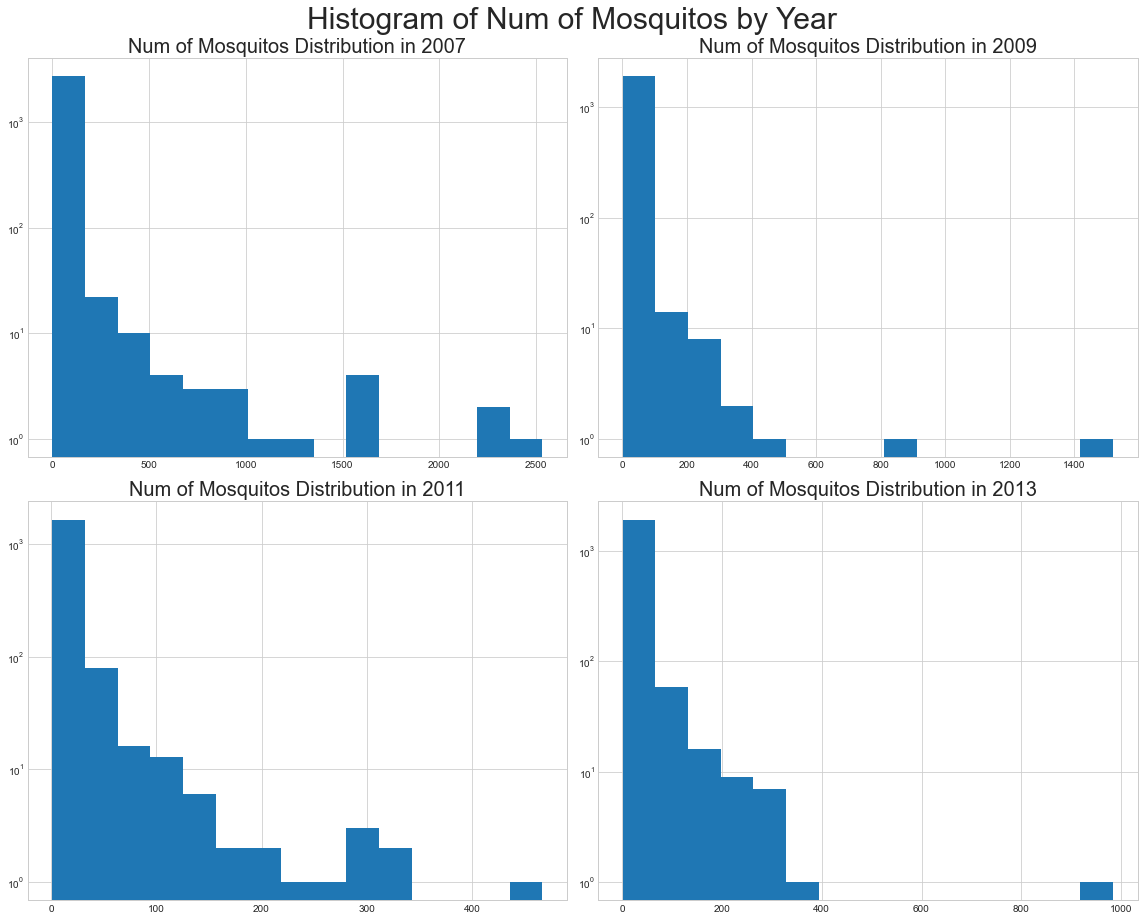

In [18]:
# Plot num of mosquitos over the years
fig, axes = plt.subplots(2,2, figsize=(16,13))
axes = axes.ravel()
years = [2007,2009,2011,2013]
plt.suptitle('Histogram of Num of Mosquitos by Year', fontsize=30)
for i in range(4):
    year = years[i]
    axes[i].hist(x = train[train['year']== year]['nummosquitos'], bins = 15)
    axes[i].set_yscale('log')
    axes[i].set_title(f'Num of Mosquitos Distribution in {year}', fontsize=20)
    
plt.tight_layout()
plt.savefig('../images/num_mosquitos_yearly.png', dpi = 150)

- From the above observed distribution, the number of mosquito breeds tend to be at a higher scale ranging to a peak of about 2500 in the year 2007.
- In 2009 and 2011 the distribution trends to lower the number of mosquito breeds of about 1400 and 450 in the respective years which could possibility be the effects from the traps and spraying.

In [19]:
print('Num of traps sampled over the years')
print(train.groupby('year')['trap'].count())
print('')
print('Presence of virus over the years')
print(train.groupby('year')['wnvpresent'].sum())

Num of traps sampled over the years
year
2007    2775
2009    1915
2011    1773
2013    2012
Name: trap, dtype: int64

Presence of virus over the years
year
2007    189
2009     19
2011     50
2013    199
Name: wnvpresent, dtype: int64


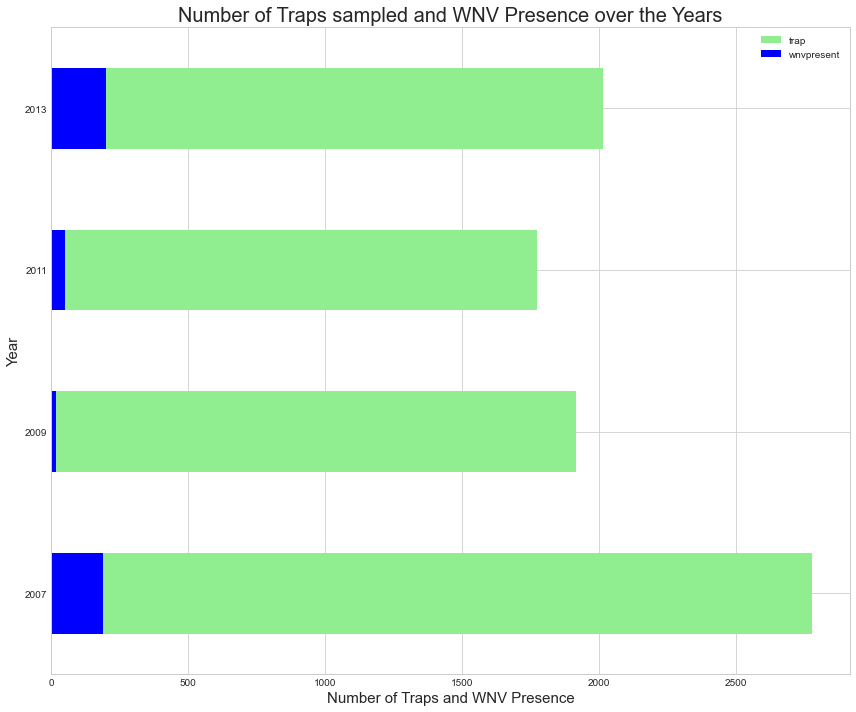

In [20]:
# Plot for number of traps sampled and WNV pressence over the years
plt.figure(figsize=(12,10))
train.groupby('year')['trap'].count().plot(kind='barh', color='lightgreen')
train.groupby('year')['wnvpresent'].sum().plot(kind='barh', color='blue')
plt.title('Number of Traps sampled and WNV Presence over the Years', fontsize=20)
plt.xlabel('Number of Traps and WNV Presence', fontsize=15)
plt.ylabel('Year', fontsize=15)
plt.legend()

plt.tight_layout()
plt.savefig('../images/num_traps_yearly.png', dpi = 150)

- Highest rates of West Nile Virus, together with the number of traps sampled were in 2007 and 2013.

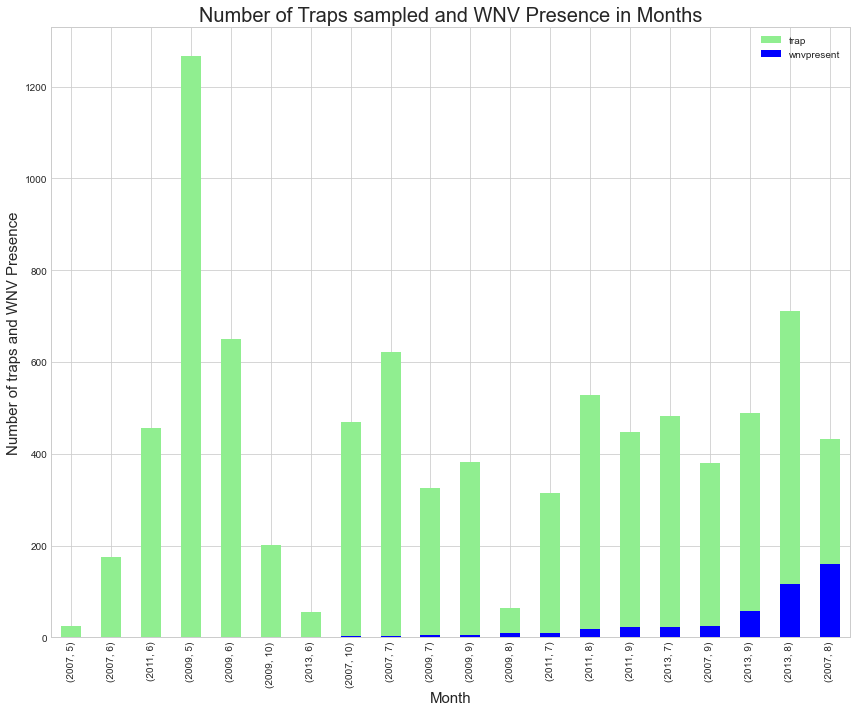

In [21]:
# Plot for number of traps sampled and WNV pressence in months
plt.figure(figsize=(12,10))
train.groupby(['year','month'])['trap'].count().plot(kind='bar', color='lightgreen')
train.groupby(['year','month'])['wnvpresent'].sum().sort_values(ascending=True).plot(kind='bar', color='blue')
plt.title('Number of Traps sampled and WNV Presence in Months', fontsize=20)
plt.ylabel('Number of traps and WNV Presence', fontsize=15)
plt.xlabel('Month', fontsize=15)
plt.legend()

plt.tight_layout()
plt.savefig('../images/num_traps_monthly.png', dpi = 150)

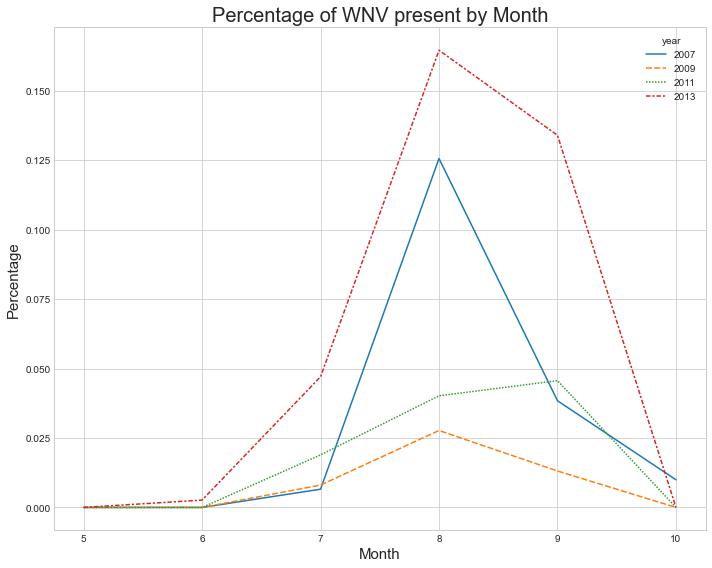

In [22]:
# Shaping a pivot table with wnvpresent percentage over month & year
wnv_month_year = pd.pivot_table(train, index= ['month'], columns =['year'], values = 'wnvpresent')
wnv_month_year = wnv_month_year.fillna(0)

# Plot of WNV present by month
plt.figure(figsize=(10,8))
sns.lineplot(data = wnv_month_year)
plt.title('Percentage of WNV present by Month', fontsize = 20)
plt.ylabel('Percentage', fontsize=15)
plt.xlabel('Month', fontsize=15)

plt.tight_layout()
plt.savefig('../images/percentage_wnv_monthly.png', dpi = 150)

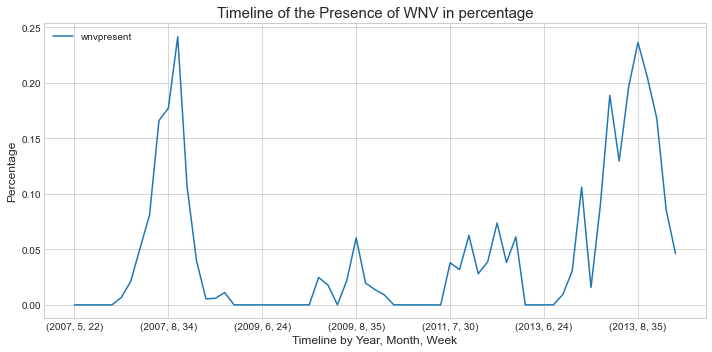

In [23]:
# Plot of WNV present by week
wnv_weekly = pd.pivot_table(train,columns=['year','month','week'],values = 'wnvpresent').T
wnv_weekly.plot(kind='line',figsize = (10,5))

# plt.figure(figsize=(10,8))
# sns.lineplot(data = wnv_weekly)
plt.title('Timeline of the Presence of WNV in percentage', fontsize = 15)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Timeline by Year, Month, Week', fontsize=12);

plt.tight_layout()
plt.savefig('../images/percentage_wnv_timeline.png', dpi = 150)

- As seen in the three plots above, the presence of WNV peaks in the months of July, August and September, especially in the years of 2007 and 2013.
- This could indicate that there is a need for the aerial spray two weeks before the peak months as the [incubation period for mosquitoes](https://www.mosquito.org/page/lifecycle) is approximately this time period. 

## Presence of the WNV w.r.t. Weather
---

In [24]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   float64       
 8   preciptotal  2944 non-null   float64       
 9   stnpressure  2944 non-null   float64       
 10  sealevel     2944 non-null   float64       
 11  resultspeed  2944 non-null   float64       
 12  resultdir    2944 non-null   int64         
 13  avgspeed     2944 non-null   float64       
 14  year         2944 non-null   int64         
 15  month        2944 non-null   int64         
 16  week  

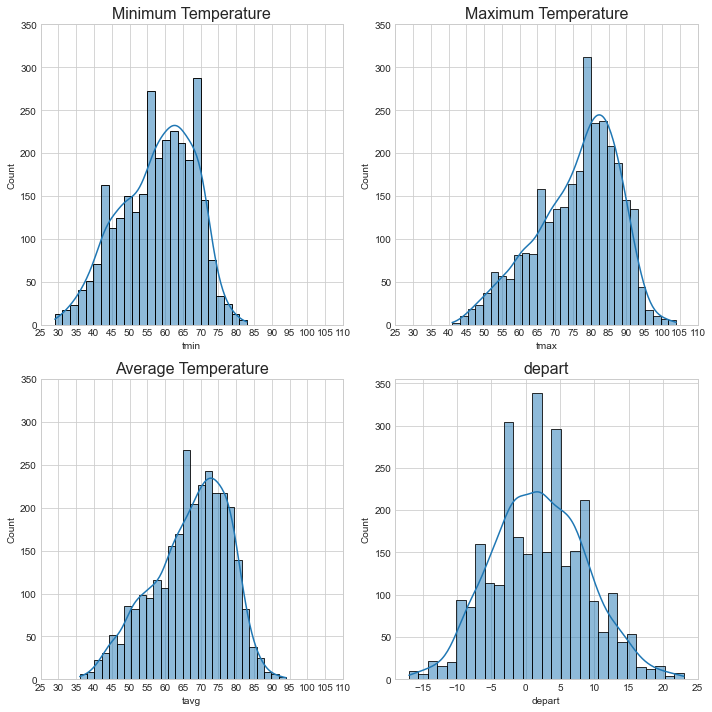

In [25]:
# Effect of temperature.
# Distribution of temperatures for min, max and avg 

#setting number of plots and position
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.histplot(weather['tmin'], kde=True, ax=ax[0,0])
ax[0,0].xaxis.set(ticks=np.arange(25,115,5))
ax[0,0].yaxis.set(ticks=np.arange(0,400,50))
ax[0,0].set_title('Minimum Temperature', fontsize=16)

sns.histplot(weather['tmax'], kde=True, ax=ax[0,1])
ax[0,1].xaxis.set(ticks=np.arange(25,115,5))
ax[0,1].yaxis.set(ticks=np.arange(0,400,50))
ax[0,1].set_title('Maximum Temperature', fontsize=16)

sns.histplot(weather['tavg'], kde=True, ax=ax[1,0])
ax[1,0].xaxis.set(ticks=np.arange(25,115,5))
ax[1,0].yaxis.set(ticks=np.arange(0,400,50))
ax[1,0].set_title('Average Temperature', fontsize=16)

sns.histplot(weather['depart'], kde=True, ax=ax[1,1])
ax[1,1].yaxis.set(ticks=np.arange(0,400,50))
ax[1,1].set_title('depart', fontsize=16)
plt.tight_layout()
plt.savefig('../images/temp_counts.png', dpi = 150)
plt.show()


- The data distribution shows that the temperatures are higher for most of the days in Chicago throughout the years of 2007, 2009, 2011 and 2013.
- The highest counts of minimum and maximum temperatures are approximately 60 degree F to 80 degree F, which is the [ideal temperature for mosquitoes to breed](https://www.mosquito.org/page/lifecycle). 

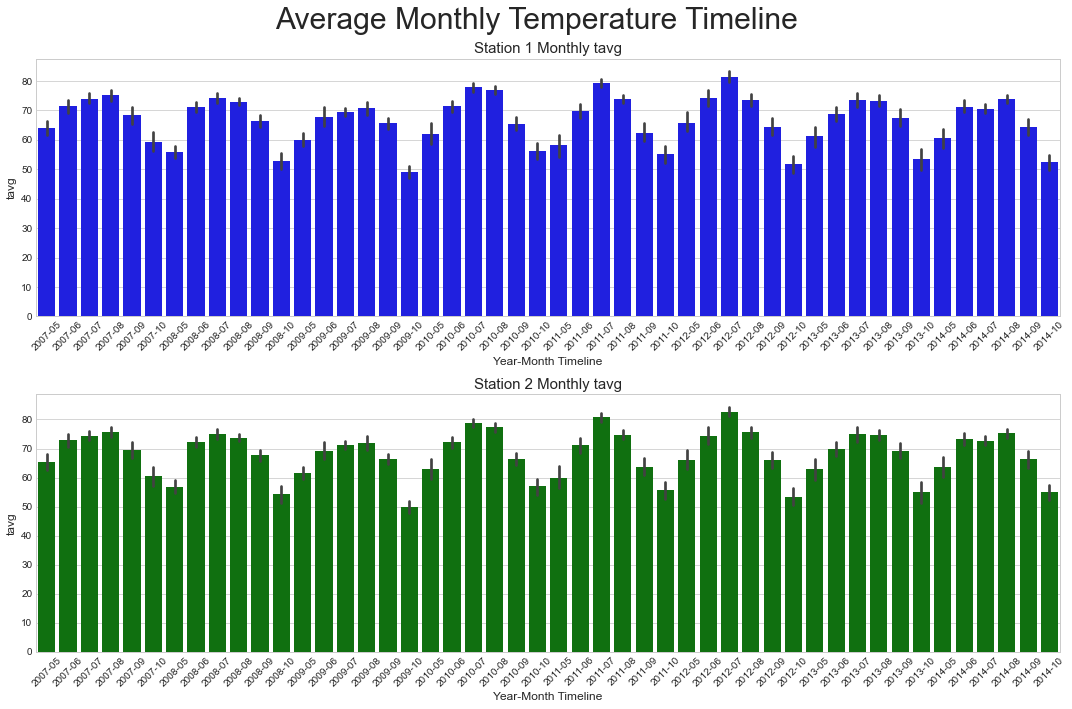

In [26]:
#Adding year_month column
weather['year_month'] = pd.to_datetime(weather['date']).apply(lambda x: '{}-{:02d}'.format(x.year, x.month))

# Function call for data comparsion for weather data
def subplot_barplot(x,y):
    fig, ax = plt.subplots(2,1, figsize=(15,10)) 
    sns.barplot(data=weather[(weather['station']==1)], x=x,y=y,label = "Station 1",
                            ax=ax[0],color='blue') 
    sns.barplot(data=weather[(weather['station']==2)], 
                            x=x,y=y,label = "Station 2",
                            ax=ax[1],color='green') 
    ax[0].set_xlabel('Year-Month Timeline', fontsize=12)
    ax[0].set_ylabel(y, fontsize=12)
    
    ax[1].set_xlabel('Year-Month Timeline', fontsize=12)
    ax[1].set_ylabel(y, fontsize=12)

    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    ax[0].set_title("Station 1 Monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    ax[1].set_title("Station 2 Monthly"+str(f' {y}'),fontdict={'fontsize': 15})
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0);

# Plot to compare Average temp across a Monthly timeline
subplot_barplot('year_month','tavg')
plt.suptitle('Average Monthly Temperature Timeline', fontsize=30)
plt.tight_layout()
plt.savefig('../images/weather_station_monthly_tavg.png', dpi = 150)

- Temperature changes throughout the year is seasonal.
- We can easily pre-empt the peak season for mosquito breeding seasons since the temperature is cyclical, and deploy the aerial sprays during the months where the average temperature is 60 to 80 deg F.

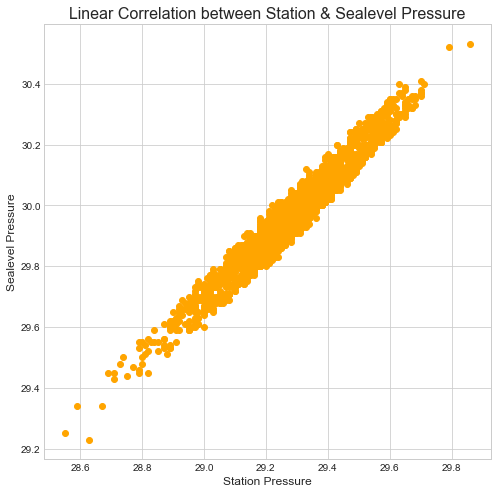

In [27]:
# Linear correlation comparison between Station and SeaLevel Pressure
plt.figure(figsize=(8,8))
plt.scatter(weather['stnpressure'],weather['sealevel'], color='orange')
plt.title('Linear Correlation between Station & Sealevel Pressure', fontsize = 16)
plt.ylabel('Sealevel Pressure', fontsize=12)
plt.xlabel('Station Pressure', fontsize=12);
plt.savefig('../images/weather_stnpressure_sealevel_lin_corr.png', dpi = 150);

- It is observed that the Station and Sea Level pressure are very closely linearly correlated.

- The sea level pressure seems to be slightly more than station pressure, since the elevated stations that are above sea level which may then lead to experiecing lower atmospheric pressure.

In [28]:
# Rearranging columns
weather_cols = list(weather.columns)
del weather_cols[19:34]
weather_cols.extend(('hz', 'fg+', 'fu', 'ra', 'dz', 'br', 'ts', 'sq', 'gr', 'sn', 'fg', 'bc',
       'vc', 'mi', 'humidavg'))
weather = weather[weather_cols]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   station      2944 non-null   int64         
 1   date         2944 non-null   datetime64[ns]
 2   tmax         2944 non-null   int64         
 3   tmin         2944 non-null   int64         
 4   tavg         2944 non-null   float64       
 5   depart       2944 non-null   float64       
 6   dewpoint     2944 non-null   int64         
 7   wetbulb      2944 non-null   float64       
 8   preciptotal  2944 non-null   float64       
 9   stnpressure  2944 non-null   float64       
 10  sealevel     2944 non-null   float64       
 11  resultspeed  2944 non-null   float64       
 12  resultdir    2944 non-null   int64         
 13  avgspeed     2944 non-null   float64       
 14  year         2944 non-null   int64         
 15  month        2944 non-null   int64         
 16  week  

In [29]:
# Merging train and test dataframes with weather dataframe
merged_train_weather = pd.merge(left=train, right=weather, left_on='date', right_on='date', how='left')
merged_test_weather = pd.merge(left=test, right=weather, left_on='date', right_on='date', how='left')


In [30]:
merged_train_weather.shape

(16950, 47)

In [31]:
merged_train_weather.isnull().sum().sum()

0

In [32]:
# Dropping common date related columns
merged_train_weather.drop(columns = ['year_y', 'month_y', 'week_y', 'dayofyear_y'], inplace=True)
merged_train_weather.head()

date  trap   latitude  longitude  year_x  month_x  week_x  \
0 2007-05-29  T096  41.731922 -87.677512    2007        5      22   
1 2007-05-29  T096  41.731922 -87.677512    2007        5      22   
2 2007-05-29  T002  41.954690 -87.800991    2007        5      22   
3 2007-05-29  T002  41.954690 -87.800991    2007        5      22   
4 2007-05-29  T015  41.974089 -87.824812    2007        5      22   

   dayofyear_x  nummosquitos  wnvpresent  species-culex_pipiens  \
0          149             1           0                      1   
1          149             1           0                      1   
2          149             1           0                      0   
3          149             1           0                      0   
4          149             1           0                      0   

   species-culex_pipiens/restuans  species-culex_restuans  station  tmax  \
0                               0                       0        1    88   
1                               0                       0        2    88   
2                               1                       0        1    88   
3                               1                       0        2    88   
4                               1                       0        1    88   

   tmin  tavg  depart  dewpoint  wetbulb  preciptotal  stnpressure  sealevel  \
0    60  74.0    10.0        58     65.0          0.0        29.39     30.11   
1    65  77.0    10.0        59     66.0          0.0        29.44     30.09   
2    60  74.0    10.0        58     65.0          0.0        29.39     30.11   
3    65  77.0    10.0        59     66.0          0.0        29.44     30.09   
4    60  74.0    10.0        58     65.0          0.0        29.39     30.11   

   resultspeed  resultdir  avgspeed    daytime year_month  hz  fg+  fu  ra  \
0          5.8         18       6.5  14.933333    2007-05   1    0   0   0   
1          5.8         16       7.4  14.933333    2007-05   1    0   0   0   
2          5.8         18       6.5  14.933333    2007-05   1    0   0   0   
3          5.8         16       7.4  14.933333    2007-05   1    0   0   0   
4          5.8         18       6.5  14.933333    2007-05   1    0   0   0   

   dz  br  ts  sq  gr  sn  fg  bc  vc  mi   humidavg  
0   0   1   0   0   0   0   0   0   0   0  57.398449  
1   0   1   0   0   0   0   0   0   0   0  53.830642  
2   0   1   0   0   0   0   0   0   0   0  57.398449  
3   0   1   0   0   0   0   0   0   0   0  53.830642  
4   0   1   0   0   0   0   0   0   0   0  57.398449

In [33]:
merged_train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 0 to 16949
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            16950 non-null  datetime64[ns]
 1   trap                            16950 non-null  object        
 2   latitude                        16950 non-null  float64       
 3   longitude                       16950 non-null  float64       
 4   year_x                          16950 non-null  int64         
 5   month_x                         16950 non-null  int64         
 6   week_x                          16950 non-null  int64         
 7   dayofyear_x                     16950 non-null  int64         
 8   nummosquitos                    16950 non-null  int64         
 9   wnvpresent                      16950 non-null  int64         
 10  species-culex_pipiens           16950 non-null  int64         
 11  sp

In [34]:
# Rearranging columns-1
merged_train_weather_cols = list(merged_train_weather.columns)
del merged_train_weather_cols[26:42]
merged_train_weather_cols.extend(('daytime', 'year_month', 'hz', 'fg+', 'fu', 'ra', 'dz', 'br', 'ts',
       'sq', 'gr', 'sn', 'fg', 'bc', 'vc', 'mi'))
merged_train_weather = merged_train_weather[merged_train_weather_cols]
merged_train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 0 to 16949
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            16950 non-null  datetime64[ns]
 1   trap                            16950 non-null  object        
 2   latitude                        16950 non-null  float64       
 3   longitude                       16950 non-null  float64       
 4   year_x                          16950 non-null  int64         
 5   month_x                         16950 non-null  int64         
 6   week_x                          16950 non-null  int64         
 7   dayofyear_x                     16950 non-null  int64         
 8   nummosquitos                    16950 non-null  int64         
 9   wnvpresent                      16950 non-null  int64         
 10  species-culex_pipiens           16950 non-null  int64         
 11  sp

In [35]:
#Rearranging columns-2
merged_train_weather_cols = list(merged_train_weather.columns)
del merged_train_weather_cols[8:28]
merged_train_weather_cols.extend(('nummosquitos', 'wnvpresent', 'species-culex_pipiens',
       'species-culex_pipiens/restuans', 'species-culex_restuans', 'station',
       'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed',
       'humidavg', 'daytime'))
merged_train_weather = merged_train_weather[merged_train_weather_cols]

In [36]:
#Rearranging columns-3
merged_train_weather_cols = list(merged_train_weather.columns)
del merged_train_weather_cols[9:23]
merged_train_weather_cols.extend(('hz', 'fg+', 'fu', 'ra', 'dz', 'br', 'ts', 'sq', 'gr', 'sn', 'fg', 'bc',
       'vc', 'mi'))
merged_train_weather = merged_train_weather[merged_train_weather_cols]
merged_train_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16950 entries, 0 to 16949
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            16950 non-null  datetime64[ns]
 1   trap                            16950 non-null  object        
 2   latitude                        16950 non-null  float64       
 3   longitude                       16950 non-null  float64       
 4   year_x                          16950 non-null  int64         
 5   month_x                         16950 non-null  int64         
 6   week_x                          16950 non-null  int64         
 7   dayofyear_x                     16950 non-null  int64         
 8   year_month                      16950 non-null  object        
 9   nummosquitos                    16950 non-null  int64         
 10  wnvpresent                      16950 non-null  int64         
 11  sp

In [37]:
# Function call for data comparison for weather and train data

def subplot_lineplot(x,y):
    """
    Inputs: Dependent and independent variable y and x.
    Output: Plots graph of x against y
    """
    fig, ax = plt.subplots(2,1, figsize=(15,10)) 
    sns.lineplot(data=merged_train_weather[(merged_train_weather['station']==1)], x=x,y=y,label = "Station 1",
                            ax=ax[0],color='blue', ci=None) 
    sns.lineplot(data=merged_train_weather[(merged_train_weather['station']==2)], 
                            x=x,y=y,label = "Station 2",
                            ax=ax[1],color='green', ci=None) 
    ax[0].set_xlabel(x, fontsize=18)
    ax[0].set_ylabel(y, fontsize=18)
    
    ax[1].set_xlabel(x, fontsize=18)
    ax[1].set_ylabel(y, fontsize=18)

#     ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
#     ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

    ax[0].set_title("Station 1: "+str(f' {y}')+" vs "+str(f' {x}'),fontdict={'fontsize': 24})
    ax[1].set_title("Station 2: "+str(f' {y}')+" vs "+str(f' {x}'),fontdict={'fontsize': 24})
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0);

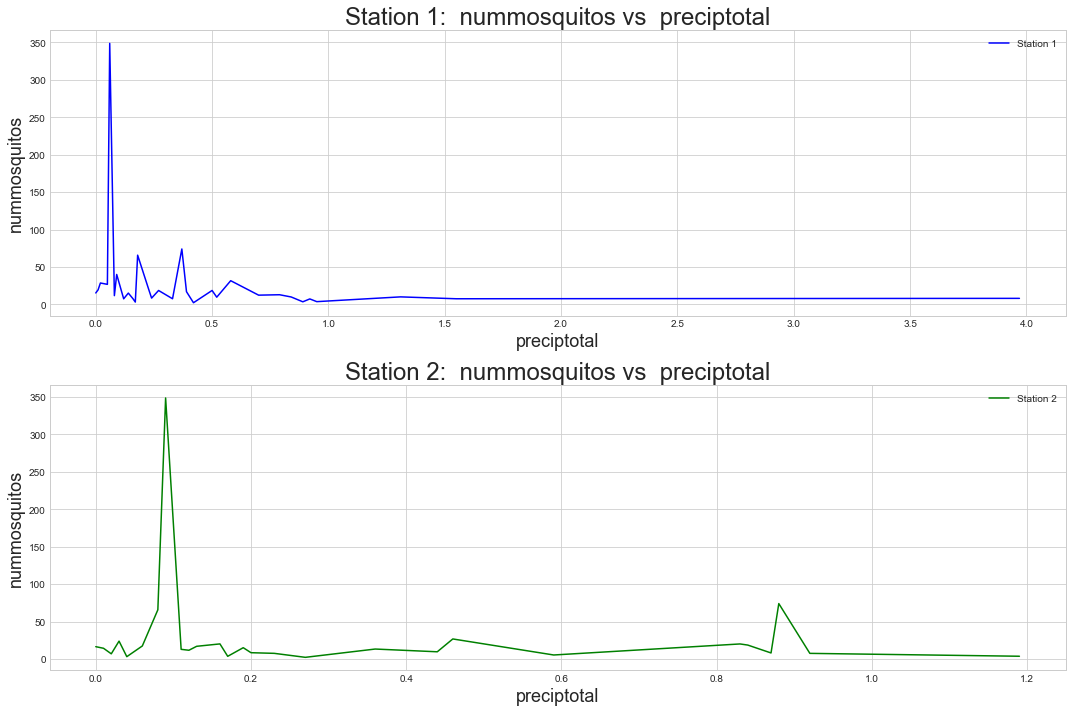

In [38]:
subplot_lineplot('preciptotal','nummosquitos')
plt.tight_layout()
plt.savefig('../images/weather_station_nummos_preciptotal.png', dpi = 150)

- The total precipitation of waterfall and snowfall affects the number of mosquito breeds ranging from 0.11 to 0.21

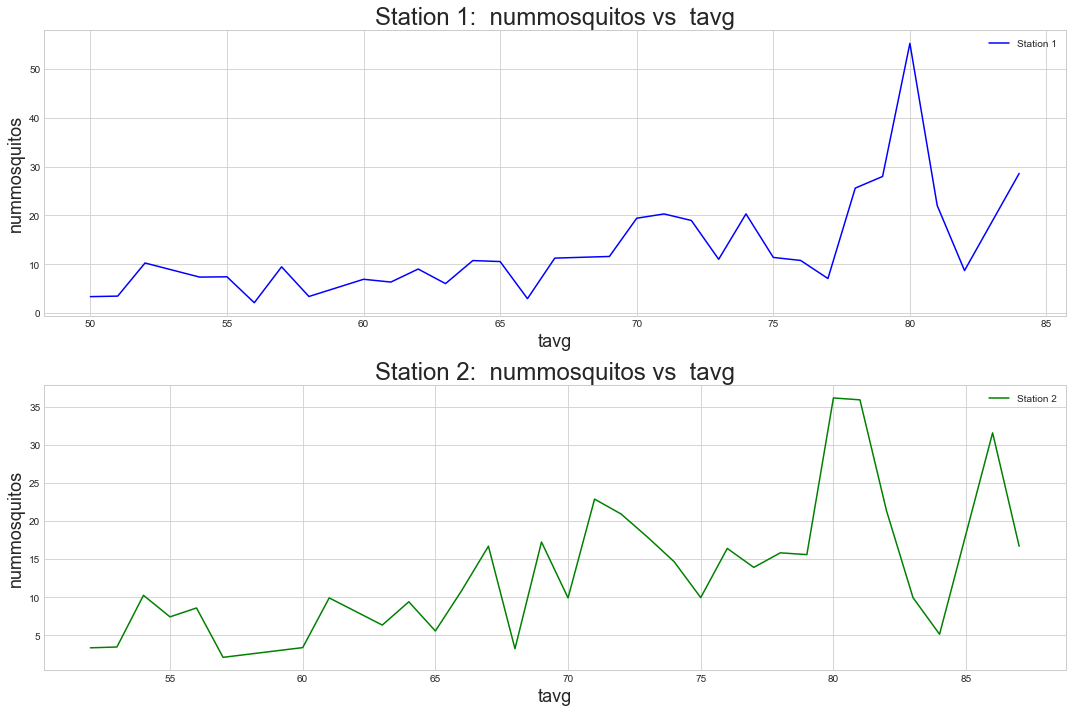

In [39]:
subplot_lineplot('tavg','nummosquitos')
plt.tight_layout()
plt.savefig('../images/weather_station_nummos_tavg.png', dpi = 150)

It seems that majority of the mosquitoes tend to have more breeds when the average temperature is at about 80 degrees F, which shows a tendency of a high temperature preference.

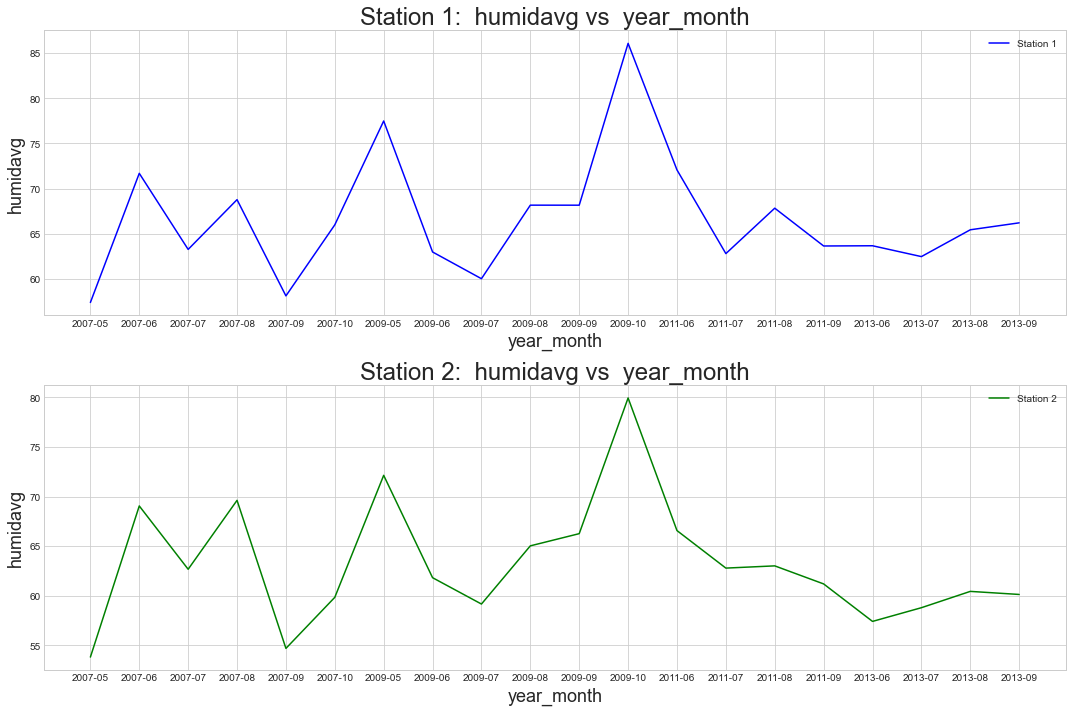

In [40]:
subplot_lineplot('year_month','humidavg')
plt.tight_layout()
plt.savefig('../images/weather_station_yearmonth_humidavg.png', dpi = 150)

In [41]:
# Assigning continuous variables for plots
cont_vars = merged_train_weather.columns[15:27]
cont_vars

Index(['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'preciptotal',
       'stnpressure', 'sealevel', 'resultspeed', 'resultdir', 'avgspeed'],
      dtype='object')

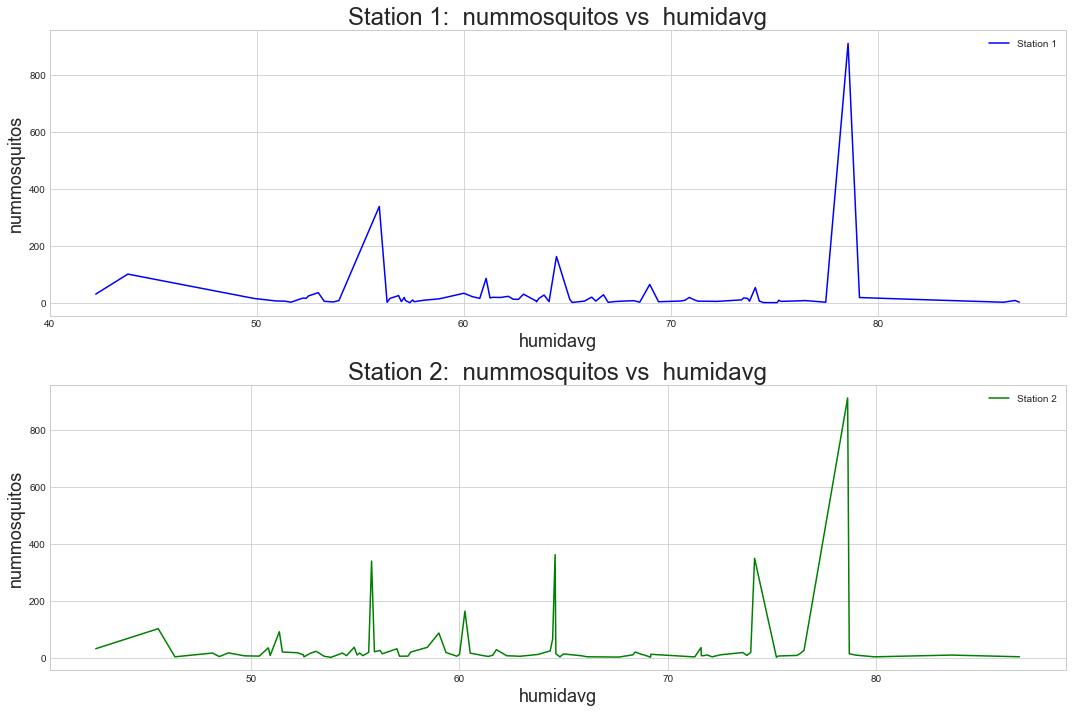

In [42]:
subplot_lineplot('humidavg','nummosquitos')
plt.tight_layout()
plt.savefig('../images/weather_station_nummos_humidavg.png', dpi = 150)

- It is observed there is a trend from the average humidity as the mosquito breeds tend to be at a higher scale when the relative humidity percentage is at about 78%.

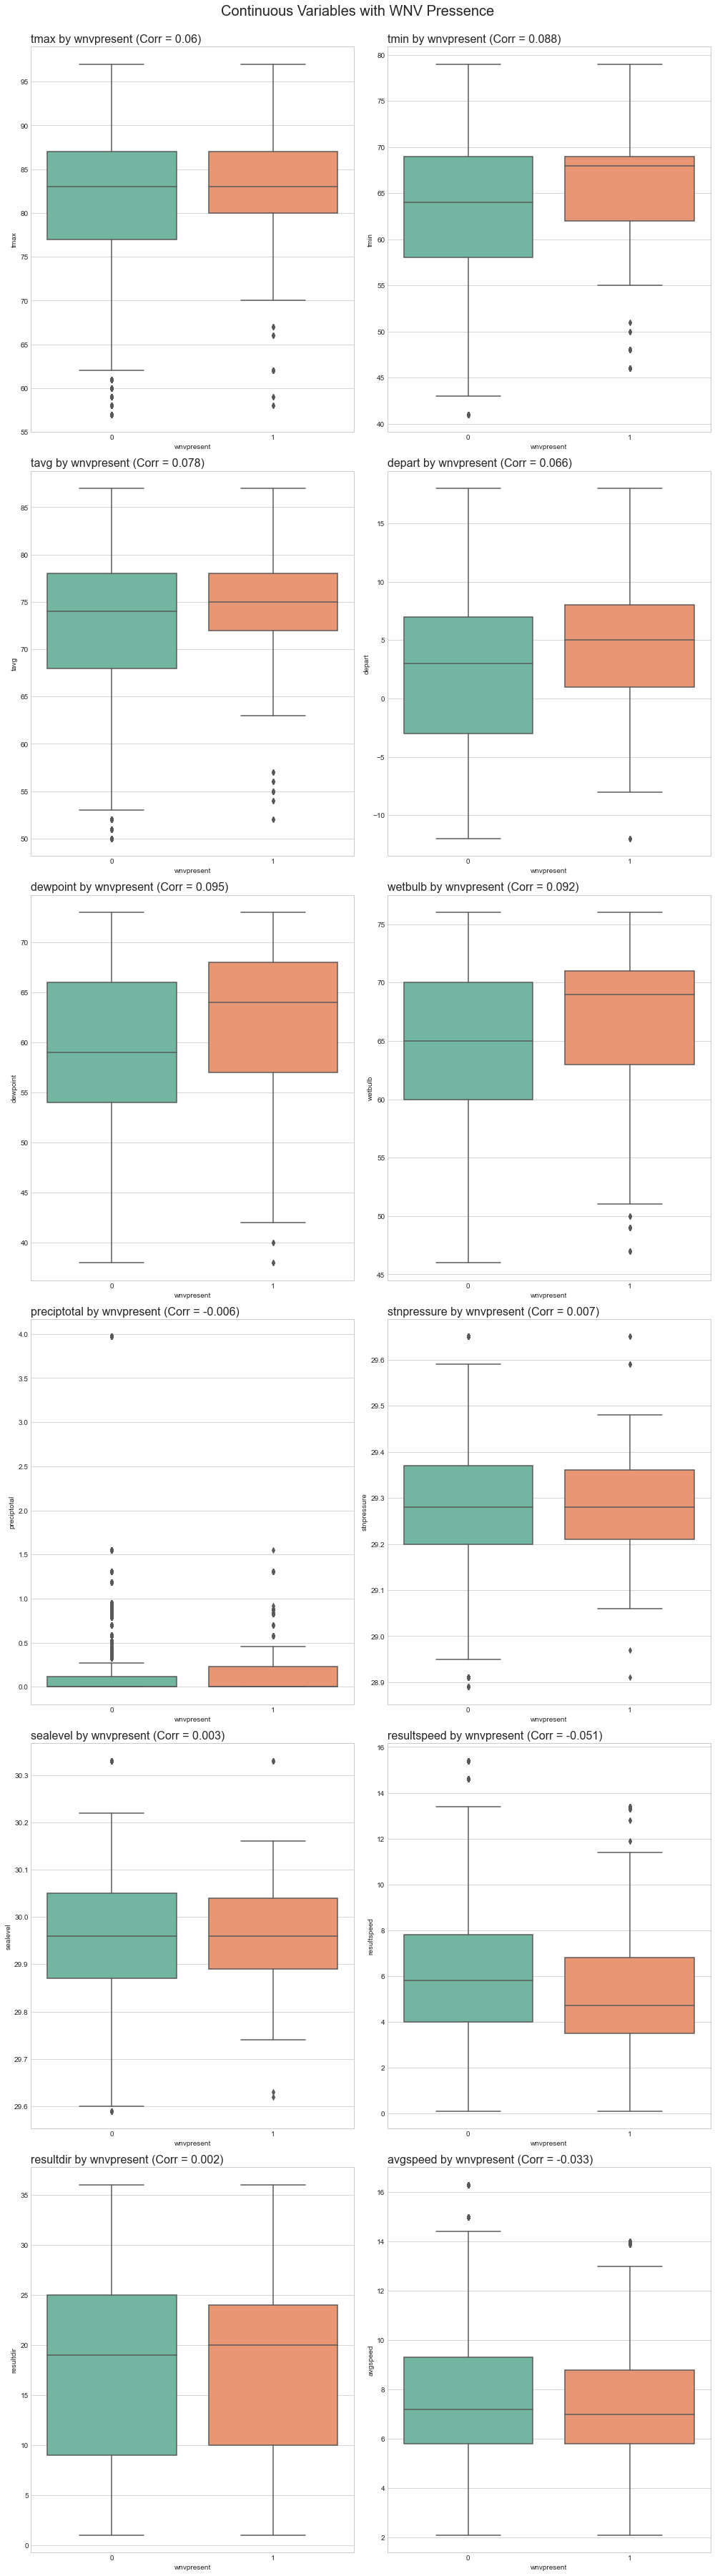

In [43]:
# Assigning continuous variables for plots
cont_vars = merged_train_weather.columns[15:27]

# Plotting boxplots of all continuous variables by wnvpresent.

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(14,50))

ax = ax.ravel()

for i, col in enumerate(cont_vars):
    
    sns.boxplot(data=merged_train_weather, x='wnvpresent', y=col, ax=ax[i], palette='Set2')
    
    corr_coef = str(round(merged_train_weather[['wnvpresent', col]].corr(method='pearson').iloc[0,1], 3))
    
    ax[i].set_title(f"{col} by wnvpresent (Corr = {corr_coef})", fontsize=16, loc='left')

fig.suptitle(x=0.5, y=1, t="Continuous Variables with WNV Pressence", fontsize=20);

plt.tight_layout()
plt.savefig('../images/weather_wnv_presence_boxplot.png', dpi = 150)

The Boxplots above demostrates the distributions of the continuous variables with the pressence of WNV.

It is noticed that there are a few outliers in preciptotal but it may be needed for further observations since precipitation is a feature that involves more breeds in mosquitoes due to the condensation of atmospheric water vapor.

It is also observed that there are few strongly correlated features with respect to the WNV pressence such as tavg, dewpoint and wetbulb as seen from the correlation values which are likely to have importance for further insights.

## Looking at Spray Data

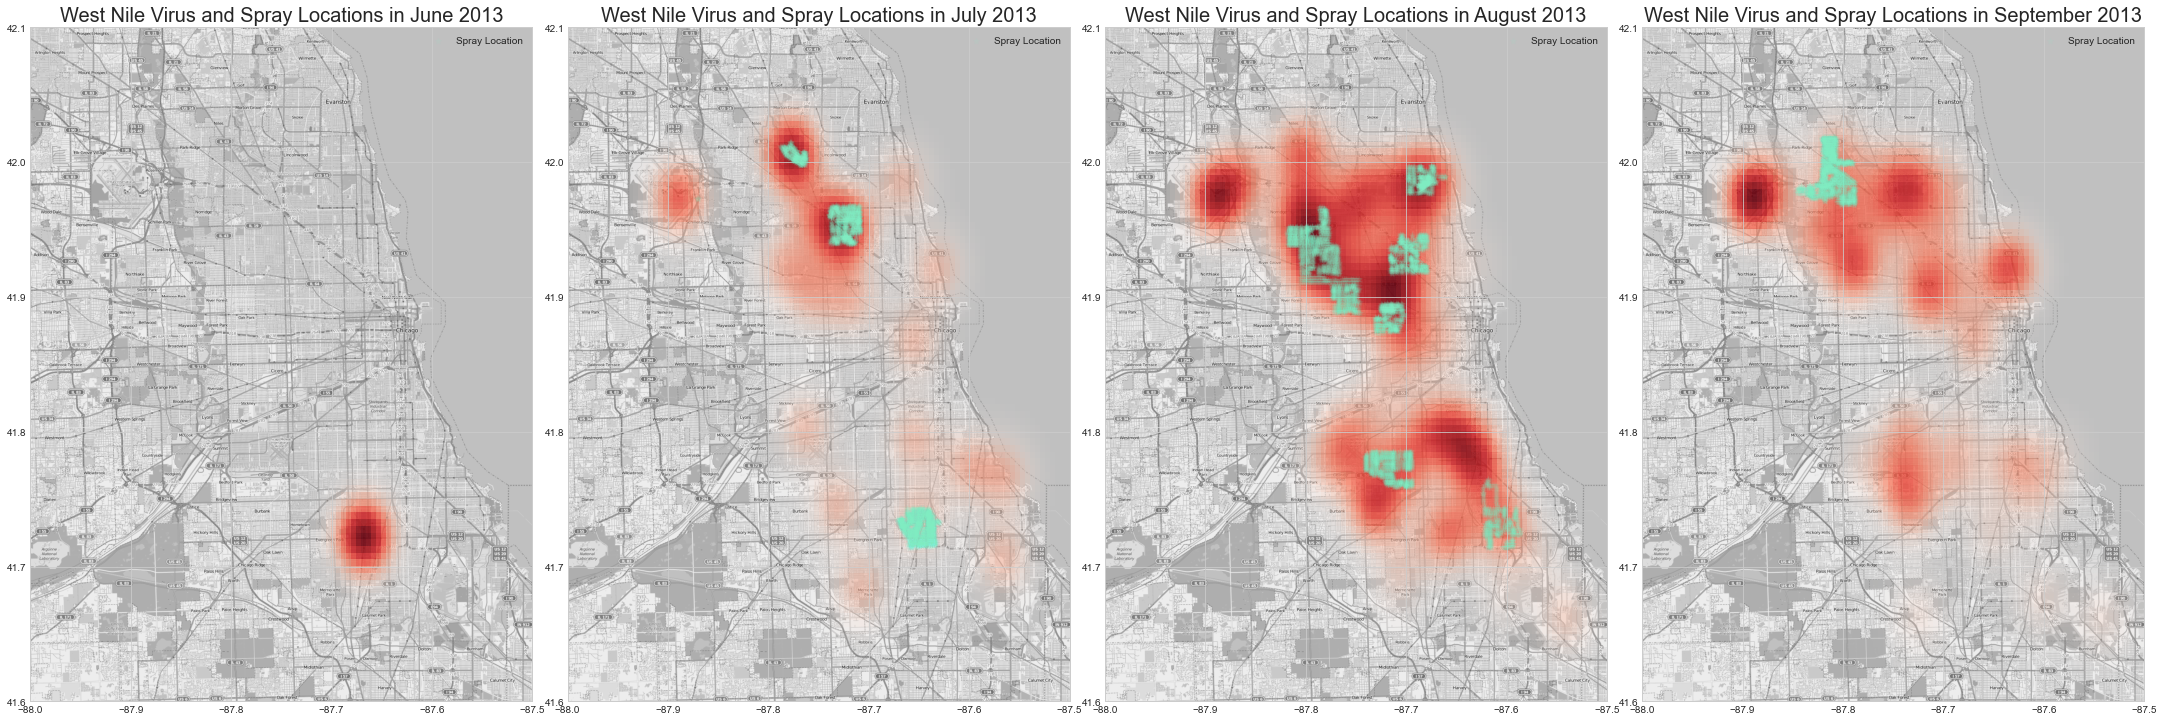

In [44]:
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")

# Visualising only 2013 data
train_2013 = train[train['year']==2013]

# Removing outlier spray data
spray.drop(index=spray[spray['latitude']>42.1].index, inplace=True)

# Enumerating by month
fig, ax = plt.subplots(figsize = (30,20),nrows = 1, ncols = 4, sharey = False)
fig.tight_layout()

# Generating subplots
for idx, month in enumerate(train_2013['month'].unique()):
    axis = ax[idx]
    axis.imshow(mapdata, cmap = plt.get_cmap('gray'), extent = (-88, -87.5, 41.6, 42.1),
               aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1])
    
    # Plotting virus data
    alphas = plt.cm.Reds
    alphas._init()
    alphas._lut[:-3, -1] = abs(np.logspace(0,1,alphas.N) / 10 - 1)[::-1]
    wnv_loc = train_2013[['longitude','latitude']][(train_2013['wnvpresent'] == 1) & (train_2013['month'] == month)]
    kern = KernelDensity(bandwidth = 0.02)
    kern.fit(wnv_loc.values)
    xv, yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(), yv.ravel()]).T
    zv = np.exp(kern.score_samples(gridpoints).reshape(100,100))
    axis.imshow(zv, origin = 'lower', cmap = alphas, extent = (-88, -87.5, 41.6, 42.1), aspect = mapdata.shape[0]*1.0/mapdata.shape[1])

    # Plotting spray Data
    spray_loc = spray[['longitude', 'latitude','month']].drop_duplicates()
    current = spray_loc[spray_loc['month']==month]
    axis.scatter(current['longitude'], current['latitude'], marker = '*', color = 'aquamarine', label = "Spray Location", alpha=0.05)

    month_dict = {6: 'June', 7: 'July', 8: 'August', 9: 'September'}
    axis.set_title(f"West Nile Virus and Spray Locations in {month_dict[month]} 2013", size=20)
    axis.legend()

plt.savefig('../images/2013_spray.png')

- Spraying seems to be effective at controlling outbreaks within a small radius
- Spraying is reactive rather than proactive, when there is an outbreak in the area

## Feature Engineering


### Clustering

In [45]:
# Generating trap locations dataset
train_loc = train[['trap', 'latitude', 'longitude']].copy()
test_loc = test[['trap', 'latitude', 'longitude']].copy()

In [46]:
# Dropping duplicate trap locations
train_loc.drop_duplicates(subset=None, inplace=True)
test_loc.drop_duplicates(subset=None, inplace=True)

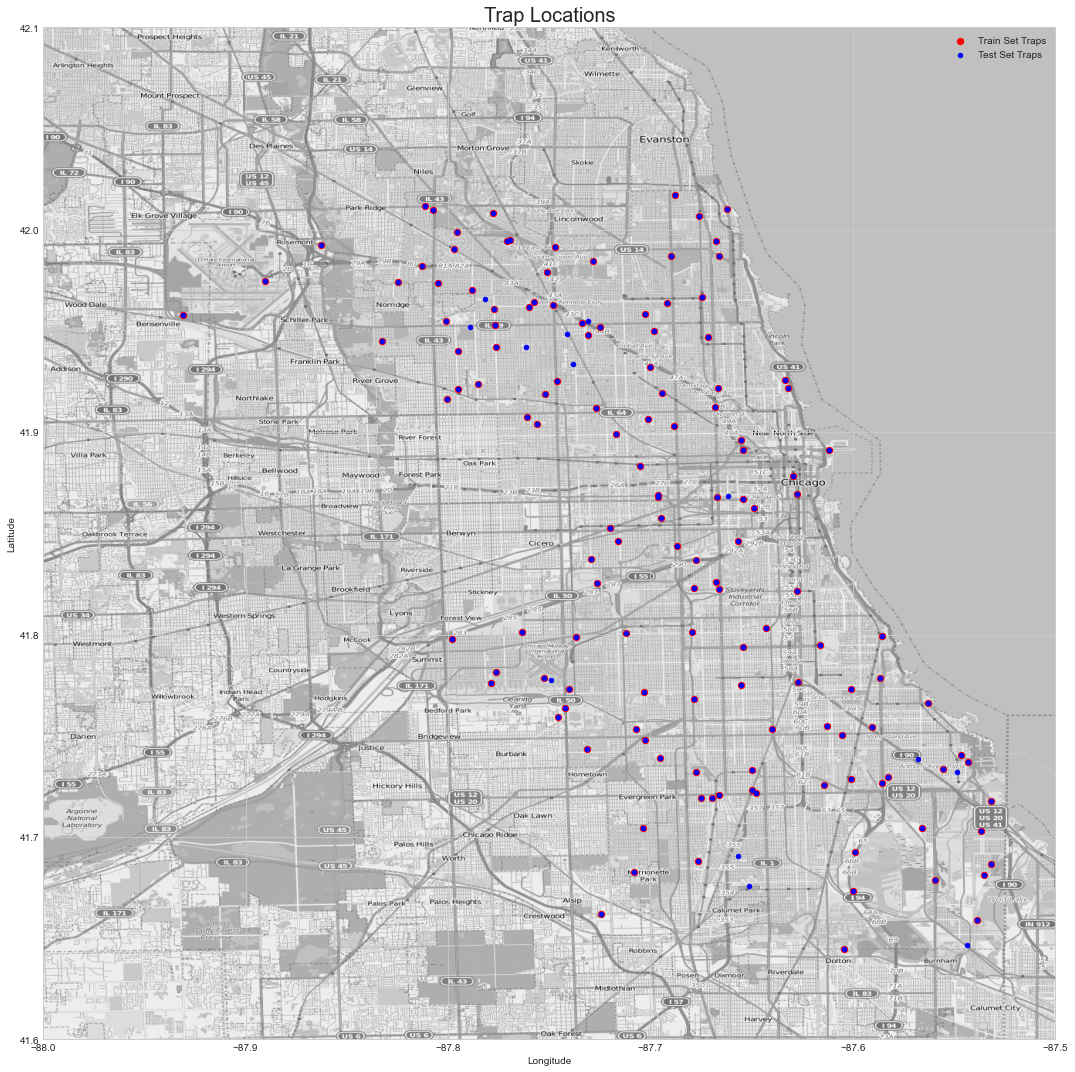

In [47]:
# Plotting trap locations
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
plt.figure(figsize=(20,15))
lon_lat = (-88, -87.5, 41.6, 42.1)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat)
plt.scatter(x=train_loc['longitude'], y=train_loc['latitude'], c='r', s=40,label='Train Set Traps')
plt.scatter(x=test_loc['longitude'], y=test_loc['latitude'], c='b', s=20,label='Test Set Traps')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Trap Locations',fontdict={'fontsize':20});

plt.tight_layout()
plt.savefig('../images/trap_locations_mapping_1.png', dpi = 150)

As all trap locations are covered by the test set, we can cluster by using the test set. 

In [48]:
# 
test_loc.set_index('trap', inplace=True)

In [49]:
test_loc.shape

(151, 2)

In [50]:
# Need to scale before clustering
ss = StandardScaler()
test_loc_ss = ss.fit_transform(test_loc)

In [51]:
# Vary k and compute list of inertia and silhouette scores 
scores = []
for k in range(10, 50):
    cl = KMeans(n_clusters=k, random_state=42)
    cl.fit(test_loc_ss)
    inertia = cl.inertia_
    sil = silhouette_score(test_loc_ss, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df.head(5)

k    inertia  silhouette
0  10  19.694783    0.400279
1  11  17.638838    0.400690
2  12  16.513561    0.394783
3  13  14.891967    0.388703
4  14  14.109496    0.362412

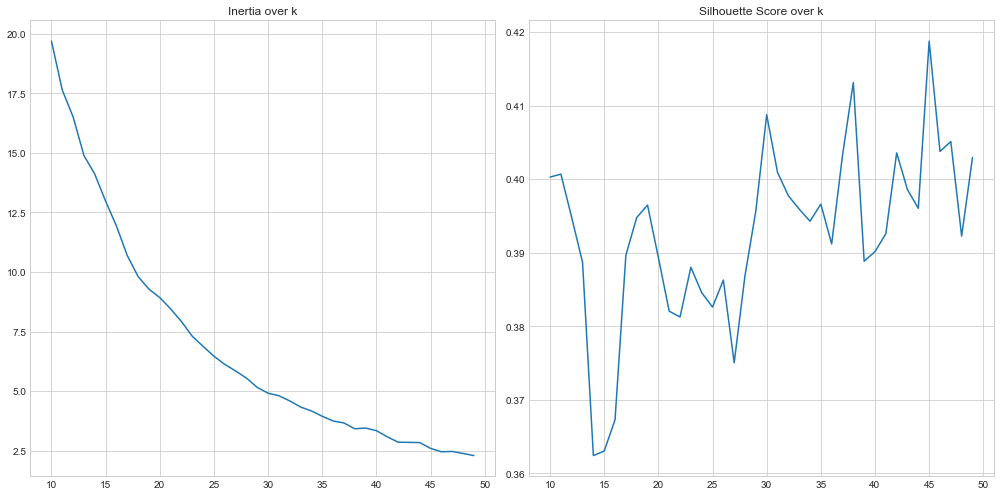

In [52]:
# Plot inertia and silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette)
axes[1].set_title('Silhouette Score over k');

plt.tight_layout()
plt.savefig('../images/kmeans_silhouette_score.png', dpi = 150)

There are peaks in the silhouette score around 10, 20, 30, and 40. As such, these Ks were each tried for K-means clustering to determine which resulted in a better model AUC-ROC score and sensitivity score. 30 gave the best scores, which may be as it splits the 150 traps into clusters of around 3 each on average, which seems to be the number of traps that are usually affected by a localised outbreak.

In [53]:
# Generate clusters
cl = KMeans(n_clusters=30, random_state=42)
cl.fit(test_loc_ss)
test_loc['cluster'] = cl.labels_

In [54]:
# Store centroids in dataframe for plotting
centroids = pd.DataFrame(
    ss.inverse_transform(cl.cluster_centers_),
    columns=["latitude", "longitude"]
)

In [ ]:
# Get color map to color traps
hsv = cm.get_cmap('hsv', 128)
colors = hsv(np.linspace(0, 1, 30))
test_loc['color'] = test_loc['cluster'].map(lambda p: colors[p])

# Plot mapdata, train traps, test traps and centroids
mapdata = np.loadtxt("../assets/mapdata_copyright_openstreetmap_contributors.txt")
plt.figure(figsize=(20,15))
lon_lat = (-88, -87.5, 41.6, 42.1)
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat)
plt.scatter(x=train_loc['longitude'], y=train_loc['latitude'], c='r', s=80,label='Train Set Traps')
plt.scatter(x=test_loc['longitude'], y=test_loc['latitude'], c=test_loc['color'], s=40,label='Test Set Traps')
plt.scatter(x=centroids['longitude'], y=centroids['latitude'], c=colors, s=200,label='Centroids', marker='*')
plt.legend()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('Trap Locations',fontdict={'fontsize':20})

plt.tight_layout()
plt.savefig('../images/trap_locations_mapping_2.png', dpi = 150)
plt.show()

In [ ]:
test_loc[test_loc.index.duplicated(keep=False)]

In [ ]:
# Save clusters as a dictionary of latitude:cluster key:value pairs.
test_loc.set_index('latitude', inplace=True)
cluster_dict = test_loc['cluster'].to_dict()
len(cluster_dict)

In [ ]:
# Assign clusters to train and test set using cluster dictionary
train['cluster'] = train['latitude'].map(lambda x: cluster_dict[x])
test['cluster'] = test['latitude'].map(lambda x: cluster_dict[x])

### Engineering weather features

As biological processes are often laggy, and also vary depending on fluctuations on different time scales, we engineered lagged moving average variables for weather to determine if this will create a better model. 

In [ ]:
# Select weather features
weather_select = weather.loc[:, ['station', 'date', 'tavg', 'preciptotal', 'stnpressure', 'sealevel', 'avgspeed', 'daytime', 'humidavg', 'fu', 'hz', 'sn', 'gr', 'sq', 'ts', 'dz', 'fg', 'fg+', 'br', 'ra']]

In [ ]:
# Split data to compute moving averages based on localised weather data at each station
weather_select_1 = weather_select[weather_select['station']==1].copy()
weather_select_2 = weather_select[weather_select['station']==2].copy()

Many permutations of features were tried to optimize ROC-AUC score (for the kaggle competition) and sensitivity (for the business case). We eventually found that fortnightly and monthly moving averages, with fortnightly moving averages lagged for 8 weeks gave the best model.

In [ ]:
def compute_lagged_weather(df, col):
    """
    Input: Data, Column to create lagged variables 
    Output: Creates new columns for moving average lagged over 2.5 months, and monthly moving average over past month.
    """
    # Computes fortnightly moving average
    df[col+'_ma_week'] = df[col].rolling(14).mean()
    ### Backfill to prevent dates in 2007 from being NA
    df[col+'_ma_week'].fillna(method='bfill', inplace=True)
    # Computes monthly moving average
    df[col+'_ma_month'] = df[col].rolling(30).mean()
    df[col+'_ma_month'].fillna(method='bfill', inplace=True)
    # Lags fortnightly average by intervals of 1 week, starting from 2 weeks ago.
    df[col+'_ma_week_2'] = df[col+'_ma_week'].shift(15)
    df[col+'_ma_week_2'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_3'] = df[col+'_ma_week'].shift(22)
    df[col+'_ma_week_3'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_4'] = df[col+'_ma_week'].shift(30)
    df[col+'_ma_week_4'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_5'] = df[col+'_ma_week'].shift(38)
    df[col+'_ma_week_5'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_6'] = df[col+'_ma_week'].shift(45)
    df[col+'_ma_week_6'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_7'] = df[col+'_ma_week'].shift(52)
    df[col+'_ma_week_7'].fillna(method='bfill', inplace=True)
    df[col+'_ma_week_8'] = df[col+'_ma_week'].shift(60)
    df[col+'_ma_week_8'].fillna(method='bfill', inplace=True)

In [ ]:
# Computes lagged weather features
compute_lagged_weather(weather_select_1, 'tavg')
compute_lagged_weather(weather_select_1, 'preciptotal')
compute_lagged_weather(weather_select_1, 'avgspeed')
compute_lagged_weather(weather_select_1, 'daytime')
compute_lagged_weather(weather_select_1, 'humidavg')

In [ ]:
compute_lagged_weather(weather_select_2, 'tavg')
compute_lagged_weather(weather_select_2, 'preciptotal')
compute_lagged_weather(weather_select_2, 'avgspeed')
compute_lagged_weather(weather_select_2, 'daytime')
compute_lagged_weather(weather_select_2, 'humidavg')

In [ ]:
# Set index as date in order to join with the train and test set
weather_select_1.set_index('date', inplace=True)
weather_select_2.set_index('date', inplace=True)

### Creating Modelling Dataset

In [ ]:
def assign_weather(df):
    """
    Input: Dataframe
    Output: Assigns weather station 1 or 2 to trap based on which station is nearer. 
    """
    stn_1_coord = (41.995, -87.933)
    stn_2_coord = (41.786, -87.752)
    # Iterates through rows, calculates haversine distance between each trap and station 1 and 2.
    for index, row in df.iterrows():
        coord = (row['latitude'], row['longitude'])
        dist_from_stn_1 = haversine(coord, stn_1_coord)
        dist_from_stn_2 = haversine(coord, stn_2_coord)
        # Creates variable station to show which station the trap is nearer to
        if dist_from_stn_1 <= dist_from_stn_2:
            df.loc[index, 'station'] = 1
        else:
            df.loc[index, 'station'] = 2

In [ ]:
# Assigns station to train and test set
assign_weather(train)
assign_weather(test)

In [ ]:
# Joins weather set to train set based on station variable
train_1 = train[train['station']==1].copy()
train_2 = train[train['station']==2].copy()
train_1.drop(columns=['station'], inplace=True)
train_2.drop(columns=['station'], inplace=True)
train_1 = train_1.join(weather_select_1, on='date')
train_2 = train_2.join(weather_select_2, on='date')
train = pd.concat([train_1, train_2])

In [ ]:
# Joins weather set to test set based on station variable
test_1 = test[test['station']==1].copy()
test_2 = test[test['station']==2].copy()
test_1.drop(columns=['station'], inplace=True)
test_2.drop(columns=['station'], inplace=True)
test_1 = test_1.join(weather_select_1, on='date')
test_2 = test_2.join(weather_select_2, on='date')

### Exporting Datasets for Modelling

In [ ]:
train.to_csv('../assets/train_clean_model.csv', index=False)
test_1.to_csv('../assets/test1_clean_model.csv', index=False)
test_2.to_csv('../assets/test2_clean_model.csv', index=False)

## Examining Correlations in Engineered Features

In [ ]:
train_2 = pd.read_csv('../assets/train_clean_model.csv')

### West Nile Virus Presence with Number of Mosquitoes

In [ ]:
df = pd.concat([train_2['wnvpresent'], train_2.loc[:, ['nummosquitos', 'longitude', 'latitude']]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation with Presence of West Nile Virus', size=14)
plt.tight_layout()
plt.savefig('../images/corr_wnv.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['nummosquitos'].min()), -1)
max_var = round(3)
bucket_array = np.logspace(min_var, max_var, 9)

train_2['nummosquitos_bin'] = pd.cut(train_2['nummosquitos'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('nummosquitos_bin')['wnvpresent'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['wnvpresent'].mean(), color='r')
plt.text(s='Mean Probability of West Nile Virus Present', x = 0, y=train_2['wnvpresent'].mean()+0.01, size=14)
plt.xlabel('Number of Mosquitoes', size=14)
plt.ylabel('Probability of West Nile Virus Present', size=14)
plt.title('Probability of WNV Present by Number of Mosquitoes', size=20)
plt.tight_layout()
plt.savefig('../images/norm_wnvpresent.png', dpi = 150)
plt.show()

As expected, as the number of mosquitoes increases, the probability of West Nile Virus being present in the trap increases

### Temperature

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, train_2.columns.str.contains('tavg')]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Temperature with Number of Mosquitoes', size=14)
plt.tight_layout()
plt.savefig('../images/corr_tavg.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['tavg'].min()), -1)
max_var = round(np.ceil(train_2['tavg'].max()), -1)
bucket_array = np.linspace(min_var, max_var, 11)

train_2['tavg_bin'] = pd.cut(train_2['tavg'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('tavg_bin')['nummosquitos'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['nummosquitos'].mean(), color='r')
plt.text(s='Mean Num Mosquitoes', x = 1, y=train_2['nummosquitos'].mean()+0.5, size=14)
plt.xlabel('Avg Temp of Observation Day (Fahrenheit)', size=14)
plt.ylabel('Number of Mosquitos Per Observation', size=14)
plt.title('Avg Temp by Number of Mosquitos Per Observation', size=20)
plt.tight_layout()
plt.savefig('../images/norm_tavg.png', dpi = 150)
plt.show()

- The correlation between the average temperature and number of mosquitoes is highest for the temperature of the day which the trap is observed
- Number of mosquitoes is highest around temperature of 80 degrees.

### Precipitation

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, train_2.columns.str.contains('preciptotal')]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Precipitation with Number of Mosquitoes', size=14)
plt.tight_layout()
plt.savefig('../images/corr_precip.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['preciptotal_ma_week'].min()), 1)
max_var = round(np.ceil(train_2['preciptotal_ma_week'].max()), 1)
bucket_array = np.linspace(min_var, max_var, 11)

train_2['preciptotal_bin'] = pd.cut(train_2['preciptotal_ma_week'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('preciptotal_bin')['nummosquitos'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['nummosquitos'].mean(), color='r')
plt.text(s='Mean Num Mosquitoes', x = 1, y=train_2['nummosquitos'].mean()+0.5, size=14)
plt.xlabel('Daily Avg Precipitation over Past 2 Weeks (Inches)', size=14)
plt.ylabel('Number of Mosquitos Per Observation', size=14)
plt.title('Daily Avg Precipitation over Past 2 Weeks by Number of Mosquitos Per Observation', size=20)
plt.tight_layout()
plt.savefig('../images/norm_precip.png', dpi = 150)
plt.show()

- The correlation between the average precipitation and number of mosquitoes is highest for the moving average over the past 2 weeks. 
- As precipitation increases, the number of mosquitoes increases.

### Daylight Hours

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, train_2.columns.str.contains('daytime')]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Daytime with Number of Mosquitoes', size=14)
plt.tight_layout()
plt.savefig('../images/corr_daytime.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['daytime_ma_week_4'].min()), 1)
max_var = round(np.ceil(train_2['daytime_ma_week_4'].max()), 1)
bucket_array = np.linspace(min_var, max_var, 11)

train_2['daytime_bin'] = pd.cut(train_2['daytime_ma_week_4'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('daytime_bin')['nummosquitos'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['nummosquitos'].mean(), color='r')
plt.text(s='Mean Num Mosquitoes', x = 1, y=train_2['nummosquitos'].mean()+0.5, size=14)
plt.xlabel('Avg Daytime over Past 2 Weeks 4 weeks ago (hours)', size=14)
plt.ylabel('Number of Mosquitos Per Observation', size=14)
plt.title('Avg Daytime 4 Weeks Ago by Number of Mosquitos Per Observation', size=20)
plt.tight_layout()
plt.savefig('../images/norm_daytime.png', dpi = 150)
plt.show()

- The correlation between the average daytime hours and number of mosquitoes is highest for the moving average lagged by 4 weeks. 
- From the point of the summer solstice to the peak of the number of mosquitoes is around 5 weeks, which explains why there is a time lag of this time period.

### Wind Speed

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, train_2.columns.str.contains('avgspeed')]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Wind Speed with Number of Mosquitoes', size=14)
plt.tight_layout()
plt.savefig('../images/corr_avgspeed.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['avgspeed_ma_week'].min()), 1)
max_var = round(np.ceil(train_2['avgspeed_ma_week'].max()), 1)
bucket_array = np.linspace(min_var, max_var, 11)

train_2['avgspeed_bin'] = pd.cut(train_2['avgspeed_ma_week'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('avgspeed_bin')['nummosquitos'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['nummosquitos'].mean(), color='r')
plt.text(s='Mean Num Mosquitoes', x = 1, y=train_2['nummosquitos'].mean()+0.5, size=14)
plt.xlabel('Avg Wind Speed over Past 2 Weeks (MPH)', size=14)
plt.ylabel('Number of Mosquitos Per Observation', size=14)
plt.title('Daily Avg Wind Speed over Past 2 Weeks by Number of Mosquitos Per Observation', size=20)
plt.tight_layout()
plt.savefig('../images/norm_avgspeed.png', dpi = 150)
plt.show()

- The correlation between wind speed and number of mosquitoes is highest for the moving average over past 2 weeks.
- High wind speeds lead to less mosquitoes.

### Humidity

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, train_2.columns.str.contains('humidavg')]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Humidity with Number of Mosquitoes', size=14)
plt.tight_layout()
plt.savefig('../images/corr_humidavg.png', dpi = 150)
plt.show()

In [ ]:
min_var = round(np.floor(train_2['humidavg_ma_week'].min()), 1)
max_var = round(np.ceil(train_2['humidavg_ma_week'].max()), 1)
bucket_array = np.linspace(min_var, max_var, 11)

train_2['humidavg_bin'] = pd.cut(train_2['humidavg_ma_week'], bucket_array)
plt.figure(figsize=(15,8))
(train_2.groupby('humidavg_bin')['nummosquitos'].mean()).plot(kind='line', fontsize=14);
plt.axhline(train_2['nummosquitos'].mean(), color='r')
plt.text(s='Mean Num Mosquitoes', x = 1, y=train_2['nummosquitos'].mean()+0.5, size=14)
plt.xlabel('Avg Humidity over Past 2 Weeks (percent)', size=14)
plt.ylabel('Number of Mosquitos Per Observation', size=14)
plt.title('Avg Humidity over Past 2 Weeks by Number of Mosquitos Per Observation', size=20)
plt.tight_layout()
plt.savefig('../images/norm_humidavg.png', dpi = 150)
plt.show()

- The correlation between wind speed and number of mosquitoes is highest for the moving average over past 2 weeks.
- High humidity leads to more mosquitoes.

### Other Weather Phenomena

In [ ]:
df = pd.concat([train_2['nummosquitos'], train_2.loc[:, ['fu', 'hz', 'sn', 'gr', 'sq', 'ts', 'dz', 'fg', 'fg+', 'br', 'ra', 'stnpressure', 'sealevel']]], axis=1)
fig, ax = plt.subplots(figsize=(7,10))   
g = sns.heatmap(pd.DataFrame(df.corr().iloc[0, 1:]), annot=True, annot_kws={"fontsize":15})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.title('Correlation of Weather Phenomena with Number of Mosquitoes', size=14)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../images/corr_weatherfeats.png', dpi = 150)
plt.show()

The only variables with a clear correlation are thunderstorm and drizzle, which reinforce the importance of precipitation at prediction.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02fccfa3-d099-440a-9b5a-6c537f7e1cad' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>